# Analysis of Seoul Bike Riding dataset 

### data exploration

In [140]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [141]:
# read in csv file
bike_data = pd.read_csv('../data/SeoulBikeData.csv', encoding='ISO-8859-1')

# observe in first 3 entries
print(bike_data.head(3))

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  


In [142]:
# correctly format date feature
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')

# check data type has been changed
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [143]:
# rename column names
bike_data = bike_data.rename({
    'Rented Bike Count': 'Rent_count',
    'Temperature(°C)': 'Temperature',
    'Humidity(%)': 'Humidity',
    'Wind speed (m/s)': 'Wind_speed',
    'Visibility (10m)': 'Visibility',
    'Dew point temperature(°C)': 'Dew_temperature',
    'Solar Radiation (MJ/m2)': 'Solar_radiation',
    'Rainfall(mm)': 'Rainfall',
    'Snowfall (cm)': 'Snowfall',
    'Functioning Day ': 'Functioning_day'}, 
    axis=1
)

# convert object datatype to categorical datatype for categorical features
categorical_col = bike_data.select_dtypes(object).columns

for col in categorical_col:
    bike_data[col] = bike_data[col].astype('category')


# check that all features are in their correct datatypes in the dataframe
print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Rent_count       8760 non-null   int64         
 2   Hour             8760 non-null   int64         
 3   Temperature      8760 non-null   float64       
 4   Humidity         8760 non-null   int64         
 5   Wind_speed       8760 non-null   float64       
 6   Visibility       8760 non-null   int64         
 7   Dew_temperature  8760 non-null   float64       
 8   Solar_radiation  8760 non-null   float64       
 9   Rainfall         8760 non-null   float64       
 10  Snowfall         8760 non-null   float64       
 11  Seasons          8760 non-null   category      
 12  Holiday          8760 non-null   category      
 13  Functioning Day  8760 non-null   category      
dtypes: category(3), datetime64[ns](1), float

In [144]:
# zero duplicated data
print(f'No. of duplicated data: {bike_data[bike_data.duplicated()].shape[0]}')

# zero missing data
print(f'No. of missing data: {np.sum(bike_data.isna().sum())}')

No. of duplicated data: 0
No. of missing data: 0


Categorical features are clean

In [145]:
# explore categorical features
categorical_features_names = bike_data.select_dtypes('category').columns

for column in categorical_features_names:
    print(f'{column} column:')
    print(bike_data[column].unique(), '\n')
    



Seasons column:
['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter'] 

Holiday column:
['No Holiday', 'Holiday']
Categories (2, object): ['Holiday', 'No Holiday'] 

Functioning Day column:
['Yes', 'No']
Categories (2, object): ['No', 'Yes'] 



In [146]:
# split X and y 
X = bike_data.drop('Rent_count', axis=1)
y = bike_data[['Rent_count']]

# verify feature counts 
print(f'original df shape: {bike_data.shape[0]} rows, {bike_data.shape[1]} columns')
print(f'features shape: {X.shape[0]} rows, {X.shape[1]} columns')
print(f'target shape: {y.shape[0]} rows, {y.shape[1]} columns\n')

# verify feature dataframe
print(f'feature names: {X.columns.to_list()}')
 

original df shape: 8760 rows, 14 columns
features shape: 8760 rows, 13 columns
target shape: 8760 rows, 1 columns

feature names: ['Date', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_temperature', 'Solar_radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day']


In [147]:
# explore summarised statistics of numerical variables
X.loc[:, X.columns != 'Date'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


There is a strong need to normalise for any distance based models and linear models due to the large differences in the median and interquartile range between <code>visibility</code> and the other features

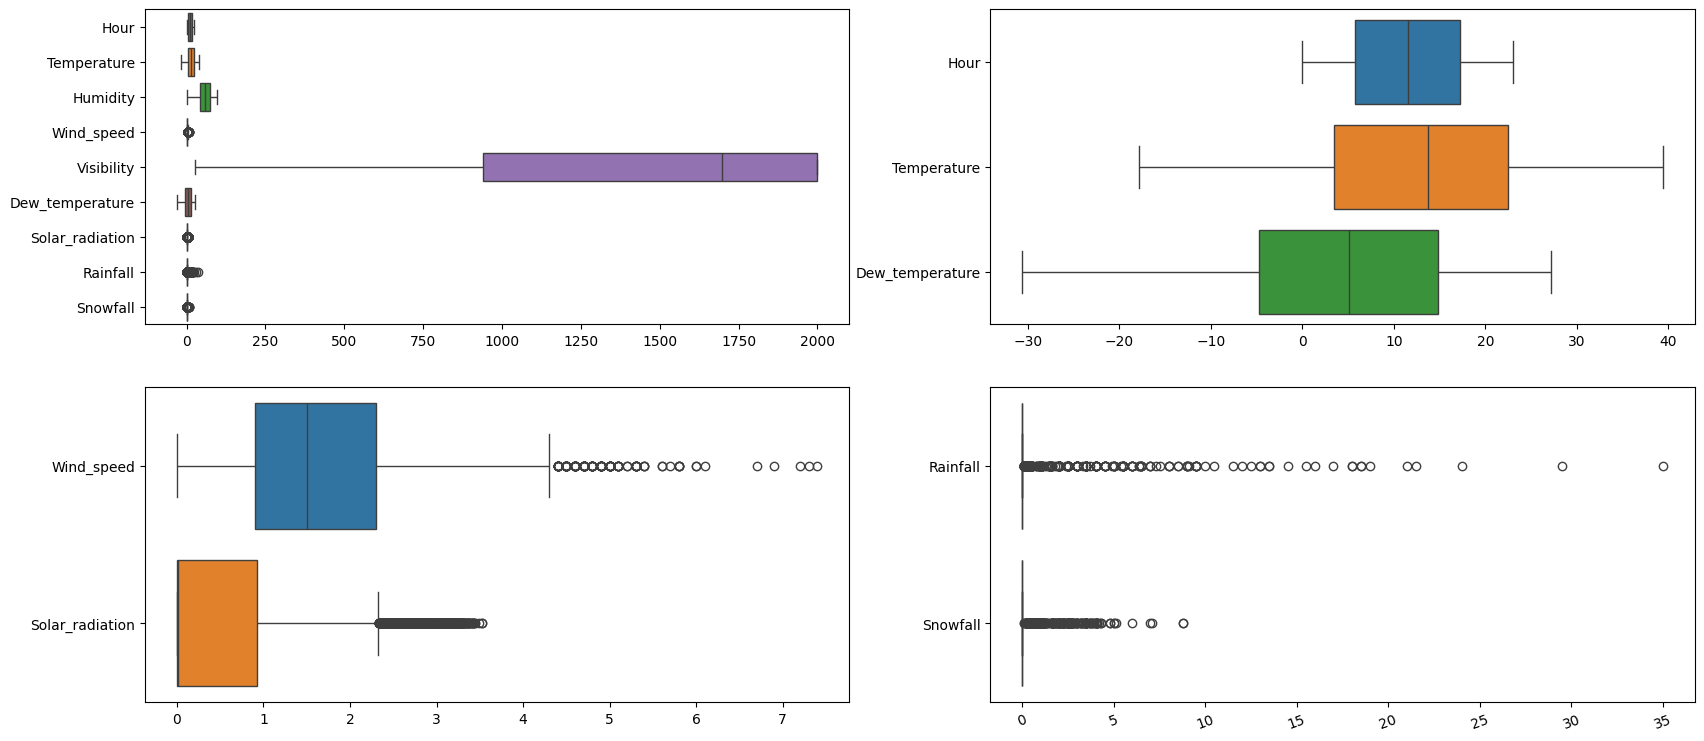

In [148]:
X_numeric = X.select_dtypes('number')

fig, ax = plt.subplots(2, 2, figsize=(20,9))
sns.boxplot(X_numeric, orient='y', ax=ax[0, 0])
sns.boxplot(X_numeric.loc[:,['Hour', 'Temperature', 'Dew_temperature']], orient='y', ax=ax[0, 1])
sns.boxplot(X_numeric.loc[:,['Wind_speed', 'Solar_radiation']], orient='y', ax=ax[1, 0])
sns.boxplot(X_numeric.loc[:,['Rainfall','Snowfall']], orient='y', ax=ax[1, 1])
plt.xticks(rotation=20)
plt.show()
#sns.boxplot(X_numeric)
#plt.xticks(rotation=70)

Temperature and Dew temperature has high correlation (0.91) and we could possibly remove one of them.

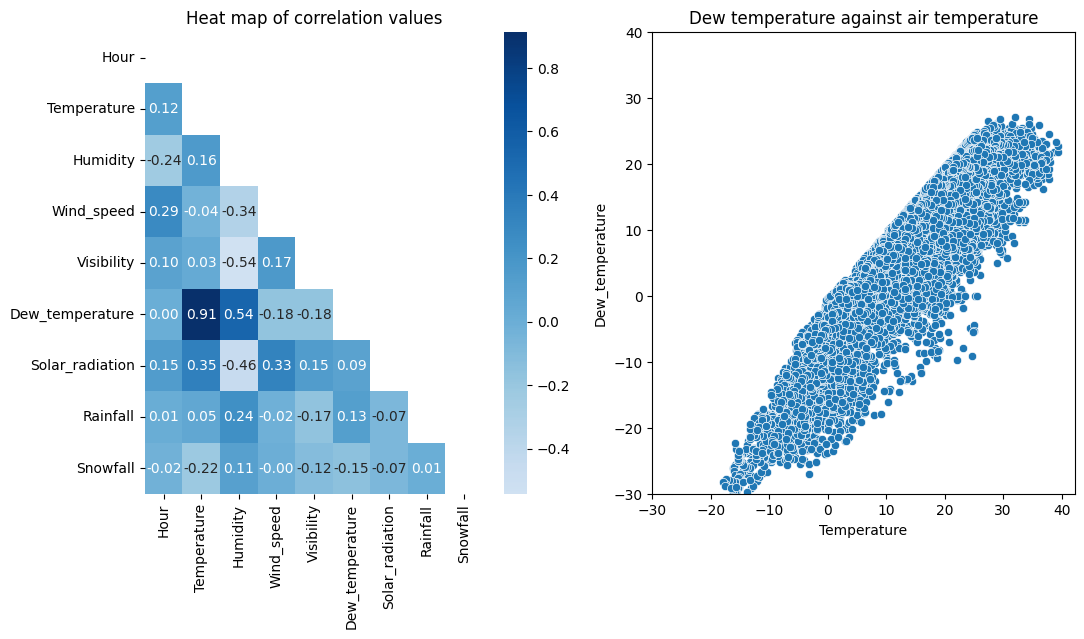

In [149]:
# numerical features
X_numeric = X.select_dtypes('number')

fig, ax = plt.subplots(1, 2, figsize=(12,6))

# explore correlation between numerical features using a heatmap
mask = np.triu(np.ones_like(X_numeric.corr(), dtype=bool))
sns.heatmap(data=X_numeric.corr( ), mask=mask, cmap='Blues', center=0, annot=True, fmt='.2f', ax=ax[0])
sns.scatterplot(data=X_numeric, x='Temperature', y='Dew_temperature',)
ax[0].set_title('Heat map of correlation values')
ax[1].set_title('Dew temperature against air temperature')
ax[1].set_xlim(-30)
ax[1].set_ylim(-30, 40)
plt.show()


In [150]:
X_numeric.columns

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_temperature', 'Solar_radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

In [151]:
X_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [152]:
# numerical features
X_numeric = X.select_dtypes('number')

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

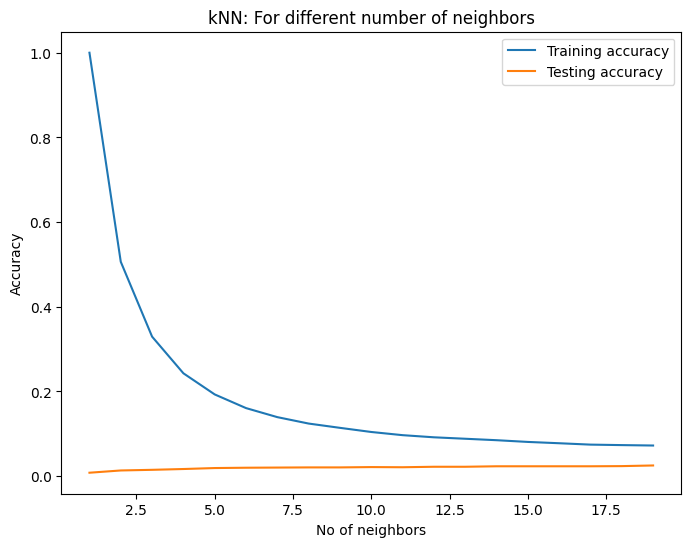

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_accuracies = { }
test_accuracies = { }
neighbors = np.arange(1, 20)

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size = 0.3, random_state=21)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, 
                                                                              y_train)
    test_accuracies[neighbor] = knn.score(X_test,  
                                                                              y_test)

plt.figure(figsize=(8, 6))
plt.title('kNN: For different number of neighbors')
plt.plot(neighbors, train_accuracies.values( ), label='Training accuracy')
plt.plot(neighbors, test_accuracies.values( ), label='Testing accuracy')
plt.legend( ) 
plt.xlabel('No of neighbors')
plt.ylabel('Accuracy')
plt.show( )

In [158]:
# using 8 neighbors
from sklearn.preprocessing import StandardScaler
 
knn = KNeighborsClassifier(n_neighbors=8)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
knn.fit(X_train_scaled, y_train.values.ravel())
y_pred = knn.predict(X_test)

knn.score(X_test, y_test)

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.000380517503805175